In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

In [28]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Data augmentation

In [75]:
augment_data = True 
if augment_data:
    append_to_original = False # you can change the value

In [76]:
if augment_data:
    datagen = ImageDataGenerator(
        rotation_range=20,  # randomly rotate images by 10 degrees
        width_shift_range=0.2,  # randomly shift images horizontally by 10%
        height_shift_range=0.2,  # randomly shift images vertically by 10%
        zoom_range=0.1,  # randomly zoom images by up to 10%
        fill_mode='nearest',  # fill in missing pixels with nearest value
        )

    X_train = train_X.reshape(train_X.shape[0], 28, 28, 1)

    datagen.fit(X_train)

    aug_X_train = datagen.flow(X_train, batch_size=60000,shuffle=False).next().reshape(X_train.shape[0], 28, 28)

    if append_to_original:
            train_X = np.append(self.train_X, aug_X_train, axis=0)
            train_y = np.append(self.train_y, self.train_y, axis=0)
    else:
        train_X = aug_X_train    

In [77]:
test_X = test_X/255
train_X = train_X/255

In [32]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [33]:
train_X.T[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output).T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output).T

In [35]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [36]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [37]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 7
Y onehot: [0 0 0 0 0 0 0 1 0 0]


<Figure size 432x288 with 0 Axes>

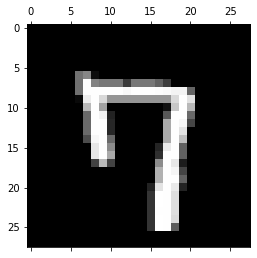

In [38]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])
    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

    # p = np.reshape(train_X_flatten.T[i].T,(28,28))
    # plt.gray()
    # plt.matshow(p)
    # plt.show()



plot_and_label_train_X(np.random.randint(0,1000))

In [39]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [40]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

In [41]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [42]:
print(train_y.shape ,train_y_onehot.shape, train_X_flatten.shape)

(60000,) (10, 60000) (784, 60000)


## IMPLEMENTING BATCH SIZE? BUT I DON'T KNOW HOW WOULD IT HELP? WHY NOT JUST USE ALL THE DATA AT ONCE

Decreasing the batch size during training of a neural network can have several potential benefits:

1- Reducing memory requirements: A smaller batch size means that fewer training examples are processed in each iteration, which can reduce the amount of memory required to store the training data and intermediate results. This can be important for training larger neural networks or when working with limited memory resources.

2- More frequent weight updates: A smaller batch size means that the neural network is updated more frequently during each epoch, which can help to speed up the training process and potentially lead to better convergence. With a larger batch size, the weight updates are less frequent, and the optimizer may take longer to converge to the optimal weights.

3- Improved generalization: Smaller batches can help to prevent the neural network from overfitting to the training data by introducing more randomness and variation into the training process. This can help the network to generalize better to new data and improve its performance on the validation and test sets.

However, decreasing the batch size may also have some potential drawbacks:

1- Slower training convergence: With smaller batch sizes, the optimization process may require more iterations or epochs to converge to the optimal weights, which can result in longer training times.

2- Noisier weight updates: With smaller batch sizes, the gradient estimates may be noisier and less accurate, which can lead to more unstable training and slower convergence. This can be mitigated by using techniques such as momentum or weight decay.

3- Overall, the optimal batch size will depend on the specific neural network architecture, dataset, and optimization algorithm used, and it may require experimentation and tuning to find the best value.






## TRAINING WITH ITERATIONS AND MANIPULATIVE BATCH SIZE

In [58]:
input = 784
hidden = 100
output = 10

Epoch: 0
0.0479
Epoch: 10
0.5306666666666666
Epoch: 20
0.7216666666666667
Epoch: 30
0.72505
Epoch: 40
0.8029666666666667
Epoch: 50
0.8260666666666666
Epoch: 60
0.8499
Epoch: 70
0.86265
Epoch: 80
0.86805
Epoch: 90
0.8787333333333334
Epoch: 100
0.8857666666666667
Epoch: 110
0.8893333333333333
Epoch: 120
0.8938833333333334
Epoch: 130
0.8997333333333334
Epoch: 140
0.9041833333333333
Epoch: 150
0.9071
Epoch: 160
0.9094
Epoch: 170
0.91105
Epoch: 180
0.9141
Epoch: 190
0.9170833333333334
Epoch: 200
0.9191166666666667
Epoch: 210
0.9209833333333334
Epoch: 220
0.9228333333333333
Epoch: 230
0.92415
Epoch: 240
0.92555
Epoch: 250
0.92675


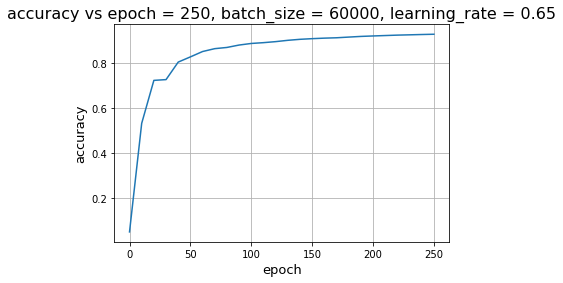

In [78]:
W1 = np.random.uniform(-0.5, 0.5, (hidden,input))
b1 = np.random.uniform(-0.5, 0.5, (hidden,1))
W2 = np.random.uniform(-0.5, 0.5, (output,hidden))
b2 = np.random.uniform(-0.5, 0.5, (output,1))

epochs = 250
batch_size = train_X.shape[0]//1
iterations = train_X_flatten.T.shape[0]//batch_size
learning_rate = 0.65

# m = batch_size
X = train_X_flatten # shape -> 784, m
Y = train_y_onehot # shape -< 10, m

# plot accuracy
accuracy_values = []
epoch_values = []

for epoch in range(epochs+1):

    for iteration in range(iterations):

        X = train_X_flatten.T[(iteration*batch_size):(iteration+1)*batch_size].T
        Y = train_y_onehot.T[(iteration*batch_size):(iteration+1)*batch_size].T
        # print(iter*batch_size)
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

        # accuracy
        if epoch % 10 == 0:
            # print(A2)
            print("Epoch:", epoch,)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, train_y.T[(iteration*batch_size):(iteration+1)*batch_size].T)
            print(accuracy)

            accuracy_values.append(accuracy)
            epoch_values.append(epoch)

fig = plt.figure(1)	#identifies the figure 
plt.title(f"accuracy vs epoch = {epoch}, batch_size = {batch_size}, learning_rate = {learning_rate}", fontsize='16')	#title
plt.plot(epoch_values, accuracy_values)	#plot the points
plt.xlabel("epoch",fontsize='13')	#adds a label in the x axis
plt.ylabel("accuracy",fontsize='13')	#adds a label in the y axis
# plt.savefig(f"epoch_{epoch} batch_size_{batch_size}.png")	#saves the figure in the present directory

plt.grid()	#shows a grid under the plot
plt.show()







## TEST ACCURACY WITH TEST DATA

In [80]:

X = test_X_flatten
Y = test_y

Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

get_accuracy(get_predictions(A2), Y)


0.9235

## TESTING WITH RANDOM INDIVIDUAL DATA


I am % 99.85 certain that it is:  2
Label: 2
Y onehot: [0 0 1 0 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

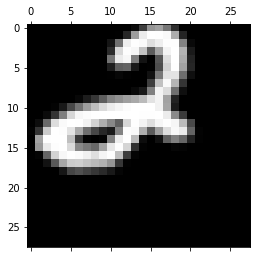

In [90]:
# index = 5151
index = np.random.randint(0,1000)
#plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T
y = train_y_onehot.T[index:index+1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

print(f"I am % {np.around(np.max(A2)*100, 2)} certain that it is: ", np.argmax(A2))
plot_and_label_train_X(index)
